In [1]:
from PIL import Image, ImageFont, ImageDraw
%matplotlib inline
from chunhu import util
from random import randint
import numpy as np

In [5]:
X = []
Y = []

for i in range(100) :
    ret = util.RandomGenerateOneFile()
    #fa = randint(75, 100)
    
    im = util.centerExtend(ret[0], radius=20)
    #im.thumbnail((40 *fa, 8.8 *fa), Image.ANTIALIAS)
    
    for j in ret[1]:
        x = (j[4] + 20)
        y = (j[5] + 20)
        #print x, y
        cr = util.crop(im, y, x, radius=20)
        
        X.append(np.asarray(cr.convert('L')))
        #train_X.append(cr)
        if j[6] == 1:
            Y.append([1,0])
        else:
            Y.append([0,1])

In [6]:
X = np.expand_dims(X, axis=3)

In [4]:
np.save('train_X', X)
np.save('train_Y', Y)

In [7]:
np.save('testing_X', X)
np.save('testing_Y', Y)

In [25]:
testing_X = np.load('./testing_X.npy')
testing_Y = np.load('./testing_Y.npy')

In [26]:
testing_X.shape

(700, 40, 40, 1)

In [13]:
X = np.squeeze(testing_X, axis=(3,))

[0 1]


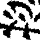

In [24]:
i =560
print testing_Y[i]
Image.fromarray(X[i], 'L')

array([0, 1])